In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
def train_model(landmarks_file, model_output_path, encoder_output_path):
    """
    Train a model using the stored landmarks
    """
    # Load landmarks data
    with open(landmarks_file, 'r') as f:
        landmarks_data = json.load(f)
    
    # Prepare data for training
    X = []  # Landmark coordinates
    y = []  # Class labels
    
    for image_path, data in landmarks_data.items():
        # Flatten landmarks array (21 landmarks × 3 coordinates = 63 features)
        landmarks_flat = np.array(data['landmarks']).flatten()
        X.append(landmarks_flat)
        y.append(data['class'])
    
    X = np.array(X)
    y = np.array(y)
    
    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    num_classes = len(label_encoder.classes_)
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42
    )
    
    # Create model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(63,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )
    
    # Evaluate model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest accuracy: {test_accuracy:.4f}")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])
    
    plt.tight_layout()
    plt.show()
    
    # Save model and label encoder
    model.save(model_output_path)
    np.save(encoder_output_path, label_encoder.classes_)
    print(f"Model saved to {model_output_path}")
    print(f"Label encoder saved to {encoder_output_path}")

c:\GWay\AI\hand-gesture\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2688 - loss: 2.1232 - val_accuracy: 0.8889 - val_loss: 1.2419
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6620 - loss: 1.1820 - val_accuracy: 0.8915 - val_loss: 0.5953
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8067 - loss: 0.6467 - val_accuracy: 0.9819 - val_loss: 0.2561
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9038 - loss: 0.3763 - val_accuracy: 0.9819 - val_loss: 0.1407
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9271 - loss: 0.2910 - val_accuracy: 0.9819 - val_loss: 0.0884
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9535 - loss: 0.1919 - val_accuracy: 0.9922 - val_loss: 0.0483
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9708 - loss: 0.1161 - val_accuracy: 0.9948 - val_loss: 0.0369
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9758 - loss: 0.0945 - val_accuracy: 0.9948 - val_los

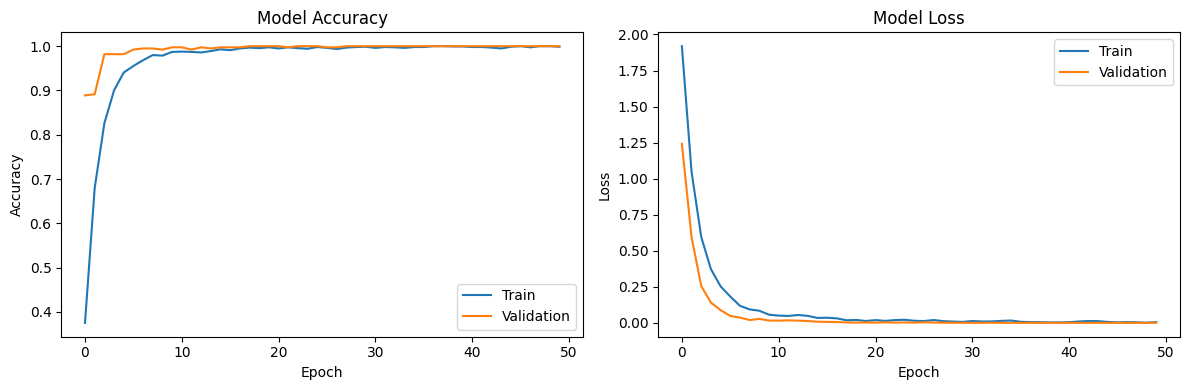

Model saved to gesture_model.h5
Label encoder saved to label_encoder.npy


In [3]:
# Usage
landmarks_file = "landmarks.json"
model_output_path = "gesture_model.h5"
encoder_output_path = "label_encoder.npy"

train_model(landmarks_file, model_output_path, encoder_output_path)